In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import scale


In [2]:
normalization = True
def normalize_features(X, lpc_max_order):
    norm_X = np.zeros(X.shape)
    n_features = X.shape[1]
    n_skip = n_features // lpc_max_order
    for f in np.arange(n_features):
        norm_X[:, f::n_skip] = scale(X[:, f::n_skip])
    return norm_X

### Extract train features

In [3]:
X_train_bonafide_list = []
X_train_spoof_list = []
max_lpc_order = 50
lpc_lengths = np.arange(1, max_lpc_order + 1)


for l in lpc_lengths:
    train_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/train_LPC_' + str(l) +'.pkl')
    train_features.drop('coeff', axis=1, inplace=True)
    train_features.dropna(inplace=True)
    
    train_bonafide_features = train_features[train_features['label']=='bonafide']
    train_spoof_features = train_features[train_features['label']=='spoof']
    
    if l==1:
        train_spoof_features = train_features[train_features['label']=='spoof'].sample(
            n=train_bonafide_features.shape[0])
        selected_files = train_spoof_features['audio_filename']
    else:
        train_spoof_features = train_spoof_features[train_spoof_features['audio_filename'].isin(selected_files)]
    X_train_bonafide_list.append(np.array(train_bonafide_features['res_energy']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['res_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['res_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['res_var']).reshape((-1, 1)))


    X_train_spoof_list.append(np.array(train_spoof_features['res_energy']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['res_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['res_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['res_var']).reshape((-1, 1)))

    
        





In [4]:
X_train_bonafide = np.concatenate(X_train_bonafide_list, axis=1)
X_train_spoof = np.concatenate(X_train_spoof_list, axis=1)
X_train = np.concatenate((X_train_bonafide, X_train_spoof), axis=0)

y_train_bonafide = np.ones((X_train_bonafide.shape[0],))
y_train_spoof = np.zeros((X_train_spoof.shape[0],))

y_train = np.concatenate((y_train_bonafide, y_train_spoof), axis=0)

In [5]:
print(np.array(X_train_bonafide_list).shape)

(200, 2518, 1)


In [6]:
feature_list = ['res_energy', 'res_max', 'res_min', 'res_var']

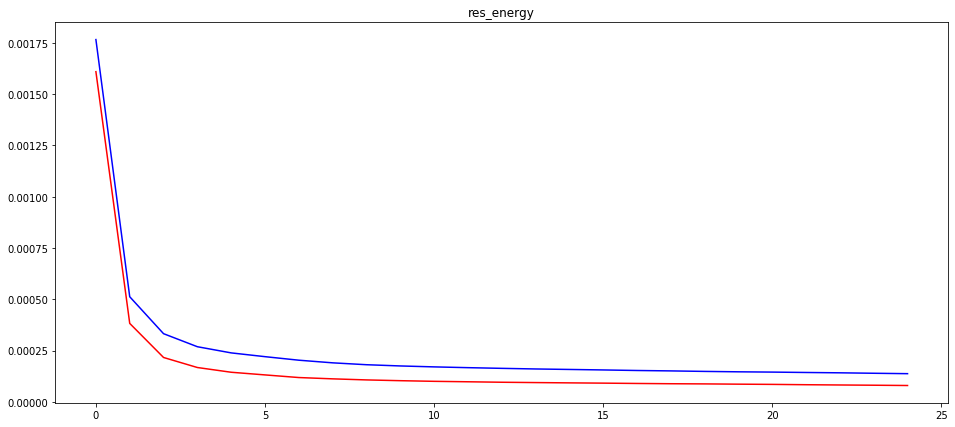

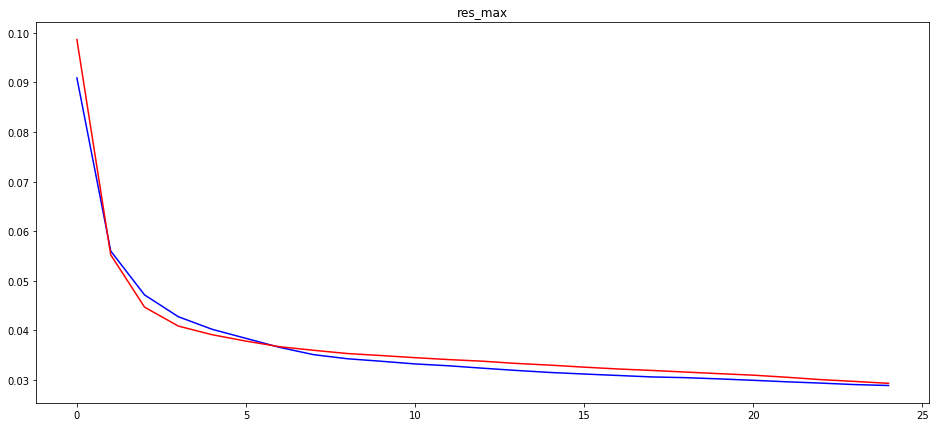

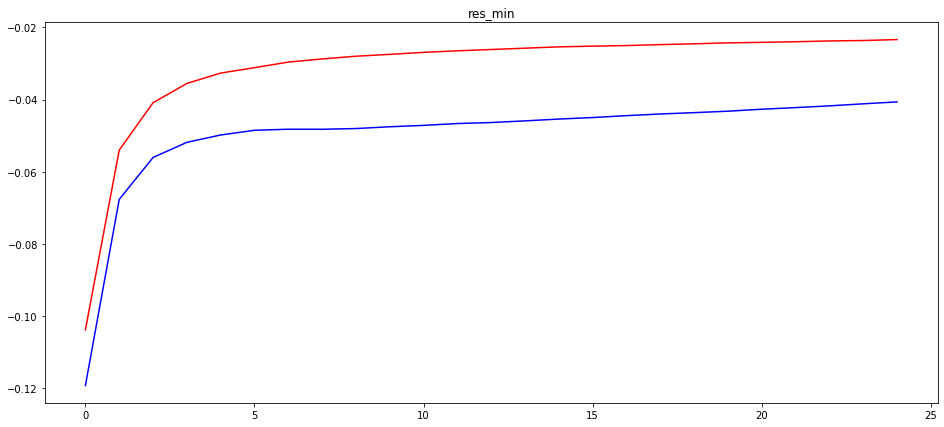

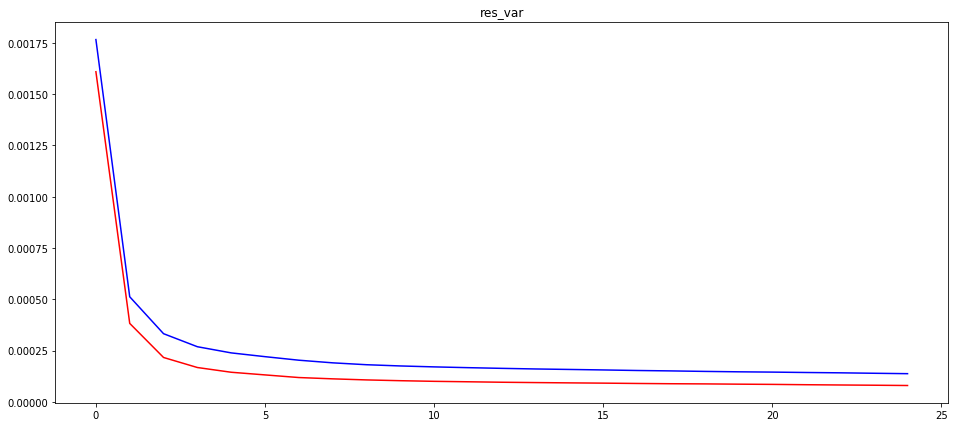

In [7]:
for i in np.arange(4):
    plt.figure(figsize=(16,7))
    feature_index = i
    plt.plot(np.nanmedian(X_train_bonafide[:, feature_index::8], axis=0), color='blue')
    plt.plot(np.nanmedian(X_train_spoof[:, feature_index::8], axis=0), color='red')
    plt.title(feature_list[i])

### Extract dev features

In [8]:
X_dev_bonafide_list = []
X_dev_spoof_list = []

for l in lpc_lengths:
    dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/dev_LPC_' + str(l) +'.pkl')
    dev_features.drop('coeff', axis=1, inplace=True)
    dev_features.dropna(inplace=True)  
    
    dev_bonafide_features = dev_features[dev_features['label']=='bonafide']
    dev_spoof_features = dev_features[dev_features['label']=='spoof']
    
    if l==1:
        dev_spoof_features = dev_features[dev_features['label']=='spoof'].sample(n=dev_bonafide_features.shape[0])
        selected_files = dev_spoof_features['audio_filename']
    else:
        dev_spoof_features = dev_spoof_features[dev_spoof_features['audio_filename'].isin(selected_files)]
    
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['res_energy']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['res_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['res_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['res_var']).reshape((-1, 1)))
    
    X_dev_spoof_list.append(np.array(dev_spoof_features['res_energy']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['res_max']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['res_min']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['res_var']).reshape((-1, 1)))


In [9]:
X_dev_bonafide = np.concatenate(X_dev_bonafide_list, axis=1)
X_dev_spoof = np.concatenate(X_dev_spoof_list, axis=1)
X_dev = np.concatenate((X_dev_bonafide, X_dev_spoof), axis=0)

y_dev_bonafide = np.ones((X_dev_bonafide.shape[0],))
y_dev_spoof = np.zeros((X_dev_spoof.shape[0],))

y_dev = np.concatenate((y_dev_bonafide, y_dev_spoof), axis=0)

In [10]:
for i in np.arange(8):
    plt.figure(figsize=(16,7))
    feature_index = i
    print(X_dev_bonafide[:, feature_index::8].shape)
    #plt.plot(np.nanmedian(X_dev_bonafide[:, feature_index::8], axis=0), color='blue')
    #plt.plot(np.nanmedian(X_dev_spoof[:, feature_index::8], axis=0), color='red')
    #plt.title(feature_list[i])

(2417, 25)
(2417, 25)
(2417, 25)
(2417, 25)
(2417, 25)
(2417, 25)
(2417, 25)
(2417, 25)


<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

### Extract eval features

In [11]:
X_eval_bonafide_list = []
X_eval_spoof_list = []

for l in lpc_lengths:
    eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/eval_LPC_' + str(l) +'.pkl')
    #eval_features = eval_features[~eval_features['audio_filename'].isin(excluded_files)]
    eval_features.drop('coeff', axis=1, inplace=True)
    eval_features.dropna(inplace=True)

    eval_bonafide_features = eval_features[eval_features['label']=='bonafide']
    eval_spoof_features= eval_features[eval_features['label']=='spoof']
    
    if l==1:
        eval_spoof_features = eval_features[eval_features['label']=='spoof'].sample(n=eval_bonafide_features.shape[0])
        selected_files = eval_spoof_features['audio_filename']
    else:
        eval_spoof_features = eval_spoof_features[eval_spoof_features['audio_filename'].isin(selected_files)]
    
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['res_energy']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['res_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['res_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['res_var']).reshape((-1, 1)))


    X_eval_spoof_list.append(np.array(eval_spoof_features['res_energy']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['res_max']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['res_min']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['res_var']).reshape((-1, 1)))


In [12]:
X_eval_bonafide = np.concatenate(X_eval_bonafide_list, axis=1)
X_eval_spoof = np.concatenate(X_eval_spoof_list, axis=1)
X_eval = np.concatenate((X_eval_bonafide, X_eval_spoof), axis=0)

y_eval_bonafide = np.ones((X_eval_bonafide.shape[0],))
y_eval_spoof = np.zeros((X_eval_spoof.shape[0],))

y_eval = np.concatenate((y_eval_bonafide, y_eval_spoof), axis=0)

IndexError: list index out of range

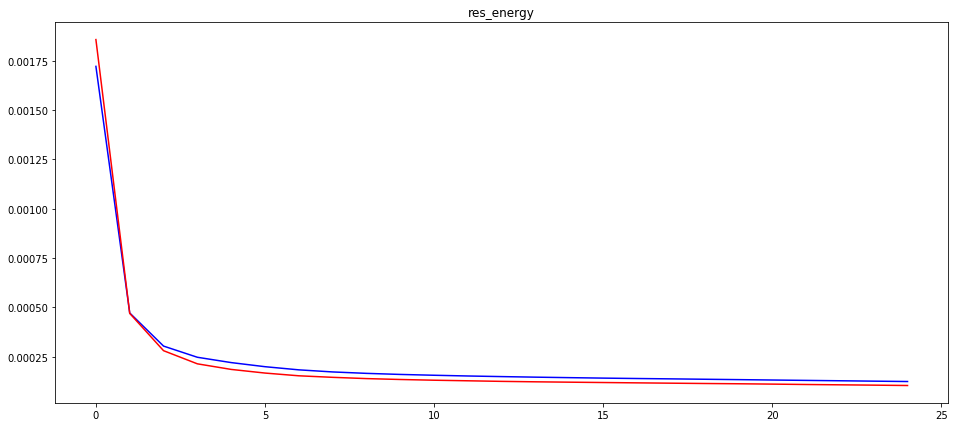

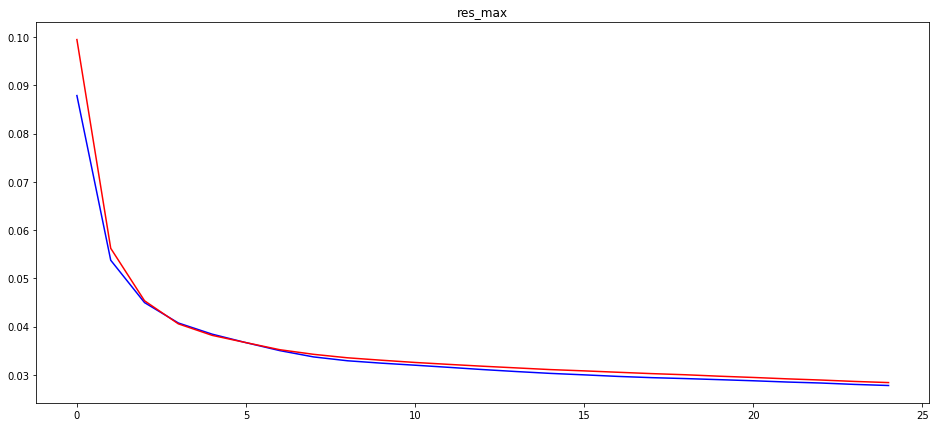

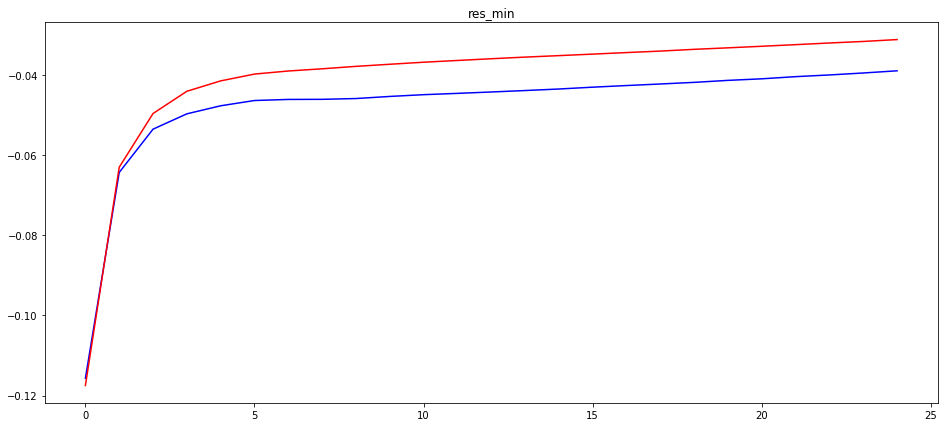

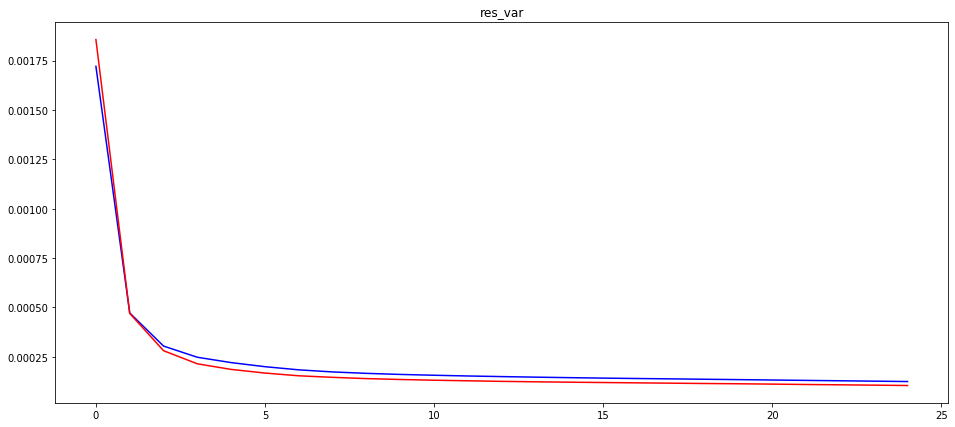

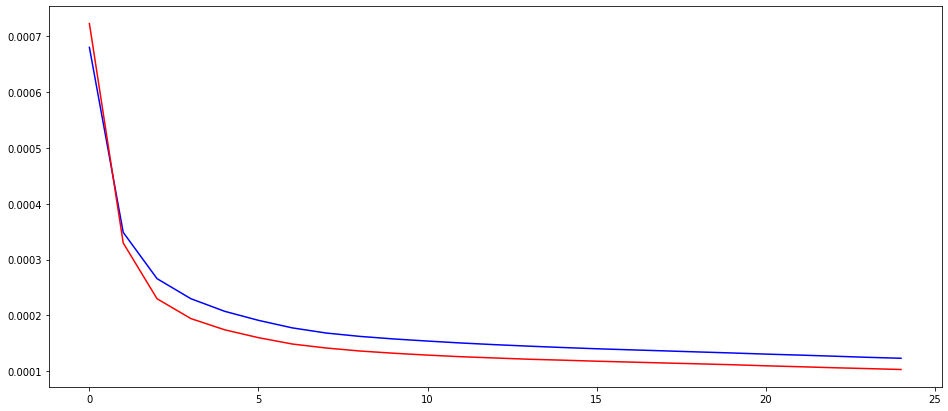

In [13]:
for i in np.arange(8):
    plt.figure(figsize=(16,7))
    feature_index = i
    plt.plot(np.nanmedian(X_eval_bonafide[:, feature_index::8], axis=0), color='blue')
    plt.plot(np.nanmedian(X_eval_spoof[:, feature_index::8], axis=0), color='red')
    plt.title(feature_list[i])

## Check nan inf and max value

In [14]:
print(np.all(np.isfinite(X_train)))
print(np.any(np.isnan(X_train)))
print(np.max(np.abs(X_train)))
print(np.finfo(np.float32).max)

True
False
0.26685158957276356
3.4028235e+38


In [15]:
X_dev[X_dev >= np.finfo(np.float32).max] = np.finfo(np.float32).max
X_train[X_train >= np.finfo(np.float32).max] = np.finfo(np.float32).max
X_eval[X_eval >= np.finfo(np.float32).max] = np.finfo(np.float32).max

### Train and test the model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_dev = poly.fit_transform(X_dev)
X_eval = poly.fit_transform(X_eval)

In [19]:
from sklearn.svm import SVC


clf = RandomForestClassifier(n_estimators=20, class_weight='balanced', random_state=2)
#clf = SVC()
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [20]:
print(clf.score(X_dev, y_dev))
print(clf.score(X_eval, y_eval))

0.8884981381878362
0.7894886363636363


[0.55]
0.8893256102606537


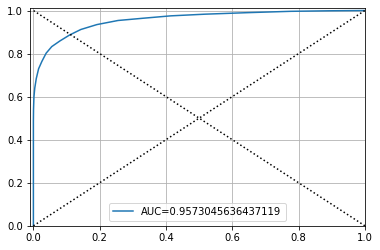

In [21]:
y_dev_hat = clf.predict_proba(X_dev)[:, 0]

[fpr, tpr, th] = roc_curve(y_dev, y_dev_hat, pos_label=0)
roc_auc = 1 - roc_auc_score(y_dev, y_dev_hat)

acc = (tpr + (1-fpr)) / 2
best_th = th[np.where(acc == np.max(acc))]
print(best_th)
print(acc.max())

plt.plot(fpr, tpr, label='AUC={}'.format(roc_auc))
plt.plot([0, 1], [0, 1], ':k')
plt.plot([1, 0], [0, 1], ':k')
plt.axis([-0.01, 1, 0, 1.01])
plt.grid(True)
plt.legend()
plt.show()

[0.4]
0.7970880681818182


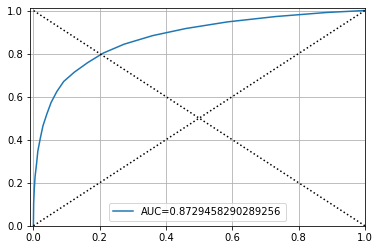

In [22]:
y_eval_hat = clf.predict_proba(X_eval)[:, 0]

[fpr, tpr, th] = roc_curve(y_eval, y_eval_hat, pos_label=0)
roc_auc = 1 - roc_auc_score(y_eval, y_eval_hat)

acc = (tpr + (1-fpr)) / 2
best_th = th[np.where(acc == np.max(acc))]
print(best_th)
print(acc.max())

plt.plot(fpr, tpr, label='AUC={}'.format(roc_auc))
plt.plot([0, 1], [0, 1], ':k')
plt.plot([1, 0], [0, 1], ':k')
plt.axis([-0.01, 1, 0, 1.01])
plt.grid(True)
plt.legend()
plt.show()

In [23]:
def obtain_asv_error_rates(tar_asv, non_asv, spoof_asv, asv_threshold):

    # False alarm and miss rates for ASV
    Pfa_asv = sum(non_asv >= asv_threshold) / non_asv.size
    Pmiss_asv = sum(tar_asv < asv_threshold) / tar_asv.size

    # Rate of rejecting spoofs in ASV
    if spoof_asv.size == 0:
        Pmiss_spoof_asv = None
    else:
        Pmiss_spoof_asv = np.sum(spoof_asv < asv_threshold) / spoof_asv.size

    return Pfa_asv, Pmiss_asv, Pmiss_spoof_asv


def compute_det_curve(target_scores, nontarget_scores):

    n_scores = target_scores.size + nontarget_scores.size
    all_scores = np.concatenate((target_scores, nontarget_scores))
    labels = np.concatenate((np.ones(target_scores.size), np.zeros(nontarget_scores.size)))

    # Sort labels based on scores
    indices = np.argsort(all_scores, kind='mergesort')
    labels = labels[indices]

    # Compute false rejection and false acceptance rates
    tar_trial_sums = np.cumsum(labels)
    nontarget_trial_sums = nontarget_scores.size - (np.arange(1, n_scores + 1) - tar_trial_sums)

    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums / target_scores.size))  # false rejection rates
    far = np.concatenate((np.atleast_1d(1), nontarget_trial_sums / nontarget_scores.size))  # false acceptance rates
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001), all_scores[indices]))  # Thresholds are the sorted scores

    return frr, far, thresholds

def compute_eer(target_scores, nontarget_scores):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    frr, far, thresholds = compute_det_curve(target_scores, nontarget_scores)
    abs_diffs = np.abs(frr - far)
    min_index = np.argmin(abs_diffs)
    eer = np.mean((frr[min_index], far[min_index]))
    return eer, thresholds[min_index]

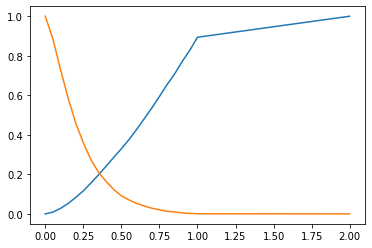

(0.11377741001241208, 0.45)

In [24]:
target_score = y_dev_hat[np.where(y_dev==0)]
nontarget_score = y_dev_hat[np.where(y_dev==1)]

fnr = 1-tpr

plt.figure()
plt.plot(th, fnr)
plt.plot(th, fpr)
#plt.plot(th, np.abs(fnr-fpr))
plt.show()

compute_eer(target_score, nontarget_score)

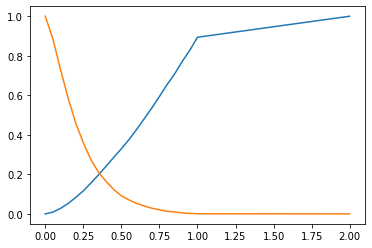

(0.21051136363636364, 0.35)

In [25]:
target_score = y_eval_hat[np.where(y_eval==0)]
nontarget_score = y_eval_hat[np.where(y_eval==1)]

fnr = 1-tpr

plt.figure()
plt.plot(th, fnr)
plt.plot(th, fpr)
#plt.plot(th, np.abs(fnr-fpr))
plt.show()

compute_eer(target_score, nontarget_score)

### Train on both train and dev, test on eval

In [26]:
X_bonafide = np.concatenate((X_train_bonafide, X_dev_bonafide), axis=0)
X_spoof = np.concatenate((X_train_spoof, X_dev_spoof), axis=0)
                
X = np.concatenate((X_bonafide, X_spoof), axis=0)

In [27]:
y_bonafide = np.ones([X_bonafide.shape[0],])
y_spoof = np.zeros([X_spoof.shape[0],])

y = np.concatenate((y_bonafide, y_spoof), axis=0)


In [28]:
X[X >= np.finfo(np.float32).max] = np.finfo(np.float32).max

In [29]:
from sklearn.svm import SVC

clf2 = RandomForestClassifier(n_estimators=20, class_weight='balanced', random_state=2)
#clf = SVC()
clf2.fit(X, y)  

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [30]:
print(clf2.score(X_eval, y_eval))

0.7964488636363637


[0.35]
0.8192471590909092


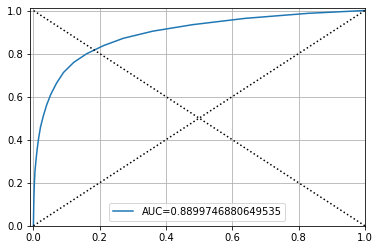

In [31]:
y_eval_hat = clf2.predict_proba(X_eval)[:, 0]

[fpr, tpr, th] = roc_curve(y_eval, y_eval_hat, pos_label=0)
roc_auc = 1 - roc_auc_score(y_eval, y_eval_hat)

acc = (tpr + (1-fpr)) / 2
best_th = th[np.where(acc == np.max(acc))]
print(best_th)
print(acc.max())

plt.plot(fpr, tpr, label='AUC={}'.format(roc_auc))
plt.plot([0, 1], [0, 1], ':k')
plt.plot([1, 0], [0, 1], ':k')
plt.axis([-0.01, 1, 0, 1.01])
plt.grid(True)
plt.legend()
plt.show()

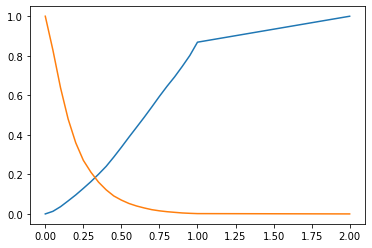

(0.20085227272727274, 0.3)

In [32]:
target_score = y_eval_hat[np.where(y_eval==0)]
nontarget_score = y_eval_hat[np.where(y_eval==1)]

fnr = 1-tpr

plt.figure()
plt.plot(th, fnr)
plt.plot(th, fpr)
#plt.plot(th, np.abs(fnr-fpr))
plt.show()

compute_eer(target_score, nontarget_score)